In [ ]:
## compare P(k,z)_DDM^L with Poulin et al.
#
# This script has been used most reently with class v3.1.2 after correcting a bug:
# source/input.c line 3010: add
#  Omega_tot += pba->Omega0_dcdmdr;
# This bug is expected to be fixed in the next days in v3.1.3

In [1]:
from classy import Class
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#### Converting the value of Gamma to km/s/Mpc
from astropy import units as u

### Set the value below
gamma_value = 1e6     # in units Gyr**(-1)

### Conversion takes place below
(gamma_value*u.Gyr**(-1)).to(u.km/u.Mpc/u.s)

<Quantity 9.77792222e+08 km / (Mpc s)>

In [3]:
kmax = 1

## Parameters taken from the paper section 3.1
common_settings = {'output':'mPk','P_k_max_h/Mpc':kmax,
                   'omega_b' : 0.02225,
                   'n_s' : 0.9645,
                   'z_reio' : 9.9
                  }
kk = np.logspace(np.log10(0.001),np.log10(2e-1),1000)

ref = Class()
ref.set(common_settings)
ref.set({'100*theta_s':1.041783,
         'omega_cdm':0.1198,
        })
ref.compute()
h = ref.h()

f_dcdm = 0.2
dm = 0.1198

model = Class()
model.empty()
model.set(common_settings)
model.set({'100*theta_s':1.041783,
           'omega_ini_dcdm' : f_dcdm*dm,
           'omega_cdm' : dm*(1-f_dcdm),
           'Gamma_dcdm' : 97.77922e8
          })
model.compute()
h_model = model.h()

In [4]:
kk = np.logspace(np.log10(1e-3),np.log10(5e-1),1000)
pk_ref = np.vectorize(ref.pk_lin)(kk*h,0)

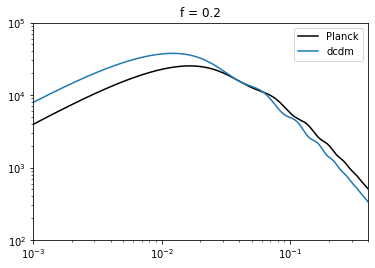

In [5]:
plt.loglog(kk,pk_ref*h**3,label='Planck',color='black')
plt.loglog(kk,np.vectorize(model.pk)(kk*h_model,0)*h_model**3,label='dcdm')
plt.title('f = {}'.format(f_dcdm))
plt.ylim((1e2,1e5))
plt.xlim((1e-3,4e-1))
plt.legend()